In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

Load the data set

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Explore the data

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Identify the target and the independent variables - Perform Logistic Regression

In [6]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=data, columns=['Churn'])
transformer = StandardScaler().fit(data[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(data[['tenure','SeniorCitizen','MonthlyCharges']])

classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, data['Churn'])

In [7]:
!pip install imblearn

In [8]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs


Scatterplot of Y values

In [30]:
x, y = make_blobs(n_samples=[5174, 1869], cluster_std=4, n_features=2, random_state=42)

In [31]:
print(x.shape)

(7043, 2)


In [32]:
import pandas as pd
pd.DataFrame(y).value_counts()

0    5174
1    1869
dtype: int64

In [33]:
df = pd.concat([pd.DataFrame(x[:,0]),pd.DataFrame(x[:,1]),pd.DataFrame(y)], axis = 1)
df.columns = ['X1','X2','Y']
df.head()

,X1,X2,Y
0,-1.666794,7.060382,0
1,-2.127821,7.960493,0
2,-4.441943,15.310233,0
3,-1.937003,12.412734,0
4,3.712405,0.605100,1


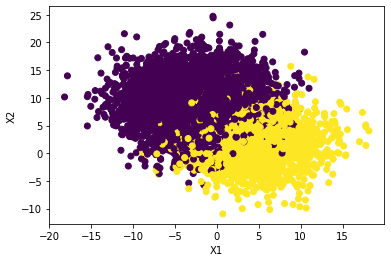

In [34]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'], df['X2'], c = df['Y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Evaluate the model

The accuracy of the model on test set is: 0.53 
[[1949 3225]
 [  94 1775]]


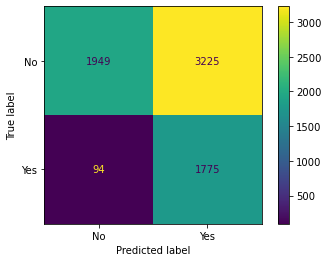

The Kappa of your model is: 0.21


In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

predictions = classification.predict(X)

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(Y, predictions))
print(confusion_matrix(Y, predictions))
plot_confusion_matrix(classification, X, Y)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(Y, predictions)))

In [25]:
print("The accuracy of the model is: ",round(classification.score(scaled_x, data['Churn']),2))
print("The kappa of the model is: ",round(cohen_kappa_score(Y,classification.predict(scaled_x)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.4


train-test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=198)

In [17]:
from sklearn.linear_model import LogisticRegression
classification1 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)


In [18]:
print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test, y_test),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_test,classification.predict(X_test)),2))

The accuracy of the model in the TEST set is:  0.54
The kappa of the model is:  0.22


THE MODEL HAS LOW KAPPA VALUE


In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
round(5174/(5176+1868),2)

0.73

#Because 'No' accounts for over 73% of total of Yes and No counts, the accuracy will be always have accuracy of more than 70% as will tend to predict 'NO'

Apply SMOTE technique

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = data['Churn']
X_sm, y_sm = smote.fit_sample(X_scaled, y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [35]:
x1, y1 = make_blobs(n_samples=[5174, 5174], cluster_std=4, n_features=2, random_state=42)

In [37]:
pd.DataFrame(y1).value_counts()

1    5174
0    5174
dtype: int64

In [39]:
df1 = pd.concat([pd.DataFrame(x1[:,0]),pd.DataFrame(x1[:,1]),pd.DataFrame(y1)], axis = 1)
df1.columns = ['X_1','X_2','Y1']
df1.head()

,X_1,X_2,Y1
0,2.330511,-4.066803,1
1,-3.070300,7.672223,0
2,3.314922,3.090130,1
3,3.868654,-3.384902,1
4,1.373427,7.098248,1


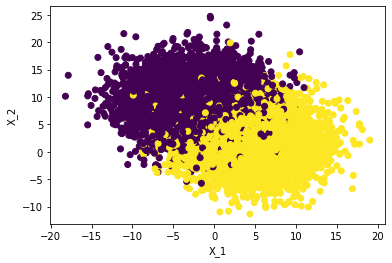

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df1['X_1'], df1['X_2'], c = df1['Y1'])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [15]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.46


The Kappy improves a little bit with SMOTE

The accuracy of the model on test set is: 0.73 
[[3767 1407]
 [1378 3796]]


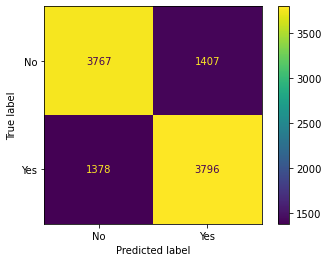

The Kappa of your model is: 0.46


In [28]:
predictions = classification.predict(X_sm)

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_sm, predictions))
print(confusion_matrix(y_sm, predictions))
plot_confusion_matrix(classification, X_sm, y_sm)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_sm, predictions)))

Apply IomekLinks technique

In [26]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = data['Churn']
X_tl, y_tl = tl.fit_sample(X_scaled, y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4694
Yes      1869
dtype: int64

In [41]:
x2, y2 = make_blobs(n_samples=[4694, 1869], cluster_std=4, n_features=2, random_state=42)

In [42]:
pd.DataFrame(y2).value_counts()

0    4694
1    1869
dtype: int64

In [43]:
df2 = pd.concat([pd.DataFrame(x2[:,0]),pd.DataFrame(x2[:,1]),pd.DataFrame(y2)], axis = 1)
df2.columns = ['X/1','X/2','Y/1']
df2.head()

,X/1,X/2,Y/1
0,10.688151,1.357579,1
1,-8.283615,7.082647,0
2,-2.452049,12.658064,0
3,2.245190,16.411735,0
4,9.343923,6.512244,1


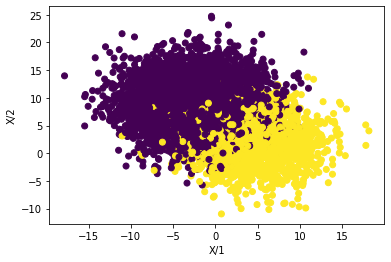

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df2['X/1'], df2['X/2'], c = df2['Y/1'])
plt.xlabel('X/1')
plt.ylabel('X/2')
plt.show()

The accuracy of the model on test set is: 0.76 
[[3591 1103]
 [ 489 1380]]


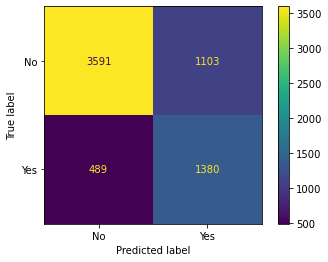

The Kappa of your model is: 0.46


In [29]:
predictions = classification.predict(X_tl)

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_tl, predictions))
print(confusion_matrix(y_tl, predictions))
plot_confusion_matrix(classification, X_tl, y_tl)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_tl, predictions)))

The Kappa is the same as when applying SMOTE technique